In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\vyshn\Downloads\UK_monthly_gdp.csv')

In [4]:
data.head()

,Time Period,GDP Growth
0,/01/2020,0.3
1,/02/2020,-0.5
2,/03/2020,-7.0
3,/04/2020,-20.9
4,/05/2020,3.2


the GDP growth over time:

<Axes: >

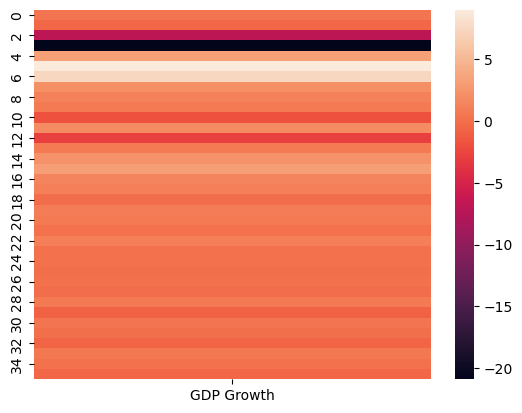

In [9]:
growth_over_time = pd.DataFrame(data['GDP Growth'],data.index)

sns.heatmap(growth_over_time)

I will convert our monthly data into quarterly data to analyze the recession:



In [13]:
data['Time Period'] = pd.to_datetime(data['Time Period'], format='/%m/%Y')
data.set_index('Time Period', inplace=True)
quarterly_data = data.resample('QE').mean()
print(quarterly_data)

             GDP Growth
Time Period            
2020-03-31    -2.400000
2020-06-30    -2.900000
2020-09-30     3.500000
2020-12-31     0.200000
2021-03-31     0.033333
2021-06-30     1.800000
2021-09-30     0.433333
2021-12-31     0.400000
2022-03-31     0.066667
2022-06-30    -0.133333
2022-09-30    -0.166667
2022-12-31     0.033333


In [17]:
quarterly_data.head()

,GDP Growth
Time Period,
2020-03-31,-2.400000
2020-06-30,-2.900000
2020-09-30,3.500000
2020-12-31,0.200000
2021-03-31,0.033333


here’s how we can calculate and analyze recession based on quarterly GDP growth:



In [18]:
quarterly_data['Recession'] = ((quarterly_data['GDP Growth']< 0) & (quarterly_data['GDP Growth'].shift(1)<0))

In [19]:
quarterly_data.head()

,GDP Growth,Recession
Time Period,,
2020-03-31,-2.400000,False
2020-06-30,-2.900000,True
2020-09-30,3.500000,False
2020-12-31,0.200000,False
2021-03-31,0.033333,False


In [20]:
quarterly_data.isna().sum()

GDP Growth    0
Recession     0
dtype: int64

In [22]:
quarterly_data['Recession'].fillna(False)

Time Period
2020-03-31    False
2020-06-30     True
2020-09-30    False
2020-12-31    False
2021-03-31    False
2021-06-30    False
2021-09-30    False
2021-12-31    False
2022-03-31    False
2022-06-30    False
2022-09-30     True
2022-12-31    False
Freq: QE-DEC, Name: Recession, dtype: bool

In [25]:
quarterly_data.head()

,GDP Growth,Recession
Time Period,,
2020-03-31,-2.400000,False
2020-06-30,-2.900000,True
2020-09-30,3.500000,False
2020-12-31,0.200000,False
2021-03-31,0.033333,False


<Axes: xlabel='Time Period'>

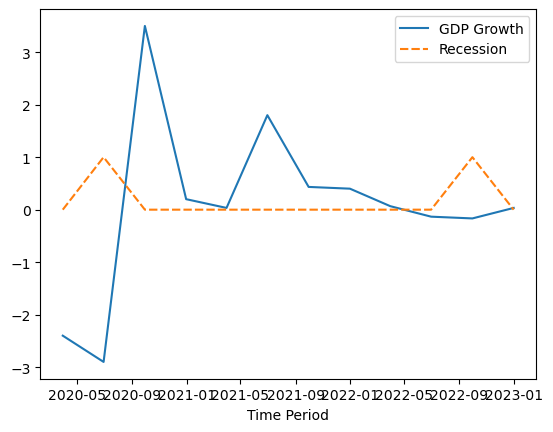

In [26]:
sns.lineplot(quarterly_data)